# Transformers for Time Series Forecasting on Arhar Gulbarga


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from sklearn.preprocessing import MinMaxScaler

# df = pd.read_csv(
#     "rainfall.csv",
#     sep=',',na_values=['-1'], index_col='Date',parse_dates=True)


df = pd.read_csv(
    "Arhar.csv",
    sep=',', index_col='Date',parse_dates=True)

print("Starting file:")
print(df[0:10])

print("Ending file:")
print(df[-10:])

len(df)

Starting file:
            Price
Date             
2017-01-02   4638
2017-01-03   4628
2017-01-04   4517
2017-01-05   4493
2017-01-06   4065
2017-01-07   4275
2017-01-09   4228
2017-01-10   4223
2017-01-11   4250
2017-01-12   4326
Ending file:
            Price
Date             
2022-12-19   7311
2022-12-20   6800
2022-12-21   7029
2022-12-22   7011
2022-12-26   7000
2022-12-27   7000
2022-12-28   7000
2022-12-29   7081
2022-12-30   7125
2022-12-31   7129


1500

In [5]:
# Test for Stationarity

# ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# Call the function and run the test
adf_test(df['Price'])


# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

# Call the function and run the test
kpss_test(df['Price'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.265414
p-value                           0.644843
#Lags Used                       24.000000
Number of Observations Used    1475.000000
Critical Value (1%)              -3.434791
Critical Value (5%)              -2.863501
Critical Value (10%)             -2.567814
dtype: float64
Results of KPSS Test:
Test Statistic            4.869225
p-value                   0.010000
#Lags Used               25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [6]:
# Test for non-linearity
# BDS test - output=(array(Test statistic), array(p-value))
# max_dim>=2

from statsmodels.tsa.stattools import bds
bds(df['Price'], max_dim=4, epsilon=0.5) #distance=1.5
# bds(df['Precipitation'], max_dim=2, epsilon=1) 
# bds(df['Precipitation'], max_dim=2, epsilon=1.5) 
# bds(df['Precipitation'], max_dim=2, epsilon=2) 

(array([  130.87855303,  1591.21881196, 27169.37378748]), array([0., 0., 0.]))

In [4]:
# #ACF and PACF
# pyplot.figure()
# pyplot.subplot(211)
# plot_acf(df, ax=pyplot.gca(),lags=100)
# pyplot.subplot(212)
# plot_pacf(df, ax=pyplot.gca(),lags=50)
# pyplot.show()

In [7]:
# Normality of the data
import numpy as np
from scipy import stats
from scipy.stats import shapiro
from numpy.random import randn

# conduct the Shapiro-Wilk Test
Shapiro_Wilks_test=shapiro(df)
print(Shapiro_Wilks_test)

# conduct the Jarque-Bera Test
jarque_bera_test = stats.jarque_bera(df)
print(jarque_bera_test)

ShapiroResult(statistic=0.9576079845428467, pvalue=1.8033201359968033e-20)
Jarque_beraResult(statistic=62.415473238448314, pvalue=2.7977620220553945e-14)


In [8]:
# demonstrate data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()
# fit scaler on data
scaler.fit(df)
# apply transform
normalized = scaler.transform(df)
# inverse transform
# inverse = scaler.inverse_transform(normalized)

In [11]:
df_train=normalized[0:1200]
df_test=normalized[1200:]

spots_train = df_train.tolist()
spots_test = df_test.tolist()

print("Training set has {} observations.".format(len(spots_train)))
print("Test set has {} observations.".format(len(spots_test)))

# #plotting the data
# df_train.plot()
# df_test.plot()

Training set has 1200 observations.
Test set has 300 observations.


In [12]:
import numpy as np

def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)
    
    
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences(SEQUENCE_SIZE,spots_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,spots_test)

print("Shape of training set: {}".format(x_train.shape))
print("Shape of training set: {}".format(y_train.shape))

print("Shape of test set: {}".format(x_test.shape))
print("Shape of test set: {}".format(y_test.shape))

Shape of training set: (1190, 10, 1, 1)
Shape of training set: (1190, 1)
Shape of test set: (290, 10, 1, 1)
Shape of test set: (290, 1)


In [14]:
# Reshaping the dimensions (reducing the dimension)

x_train=x_train.reshape(1190,10,-1)
print(x_train.shape)

y_train=y_train.reshape(1190)
print(y_train.shape)

x_test=x_test.reshape(290,10,-1)
print(x_test.shape)

y_test=y_test.reshape(290)
print(y_test.shape)

(1190, 10, 1)
(1190,)
(290, 10, 1)
(290,)


In [28]:
# Transformer

from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [29]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 1)]      0           []                               
                                                                                                  
 layer_normalization_8 (LayerNo  (None, 10, 1)       2           ['input_2[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_4 (MultiH  (None, 10, 1)       7169        ['layer_normalization_8[0][0]',  
 eadAttention)                                                    'layer_normalization_8[0][0]']  
                                                                                            

 ambda)                                                           'tf.__operators__.add_13[0][0]']
                                                                                                  
 layer_normalization_15 (LayerN  (None, 10, 1)       2           ['tf.__operators__.add_14[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv1d_14 (Conv1D)             (None, 10, 4)        8           ['layer_normalization_15[0][0]'] 
                                                                                                  
 dropout_16 (Dropout)           (None, 10, 4)        0           ['conv1d_14[0][0]']              
                                                                                                  
 conv1d_15 (Conv1D)             (None, 10, 1)        5           ['dropout_16[0][0]']             
          

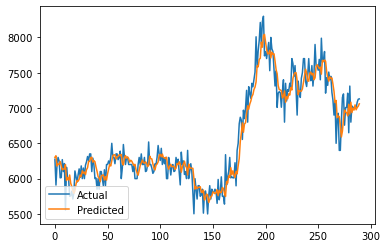

In [31]:
input_shape = x_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3)
)

model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

###########################
from sklearn.metrics import r2_score
import numpy as np
from sklearn import metrics
trainpred=model.predict(x_train)
testpred = model.predict(x_test)

#Rescaling train data
trainY=scaler.inverse_transform(y_train.reshape(1190,1))
print(trainY.shape)
# trainY=trainY.transpose()

trainPredict=scaler.inverse_transform(trainpred)
print(trainPredict.shape)

#Train RMSE
score = np.sqrt(metrics.mean_squared_error(trainY,trainPredict))
print("Score (Train RMSE): {}".format(score))

#Train MAPE
def mape(trainY,trainPredict): 
    trainY, trainPredict = np.array(trainY), np.array(trainPredict)
    return np.mean(np.abs((trainY - trainPredict) / trainY)) * 100

score1=mape(trainY,trainPredict)
print("Score (Train MAPE): {}".format(score1))

#R-Squared value
r2 = r2_score(trainY, trainPredict)
print('r2 score for perfect train model is', r2)


#Rescaling test data
testY=scaler.inverse_transform(y_test.reshape(290,1))
print(testY.shape)
# testY=testY.transpose()

testPredict=scaler.inverse_transform(testpred)
print(testPredict.shape)

#Test RMSE
score = np.sqrt(metrics.mean_squared_error(testY,testPredict))
print("Score (Test RMSE): {}".format(score))

#Test MAPE
def mape(testY,testPredict): 
    testY, testPredict = np.array(testY), np.array(testPredict)
    return np.mean(np.abs((testY - testPredict) / testY)) * 100

score1=mape(testY, testPredict)
print("Score (Test MAPE): {}".format(score1))

#R-Squared value
r2 = r2_score(testY, testPredict)
print('r2 score for perfect test model is', r2)

from pandas import read_csv
from pandas import to_datetime
from matplotlib import pyplot

# plot expected vs actual
pyplot.plot(testY, label='Actual')
pyplot.plot(testPredict, label='Predicted')
pyplot.legend(loc='lower left')
pyplot.show()

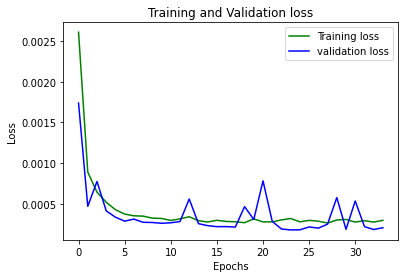

In [13]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = range(1,300)
plt.plot(loss_train, 'g', label='Training loss') #epochs
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# import pandas as pd

# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\Transformer_train.csv",trainPredict)
# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\Transformer_test.csv",testPredict)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU,RNN,SimpleRNN
from keras.layers import Bidirectional
from keras.layers import Input,Conv1D,BatchNormalization,MaxPooling1D,LSTM,Dense,Activation,Layer
from tensorflow import keras
from tensorflow.keras import layers

from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

# RNN

Epoch 1/100
60/60 [==============================] - 1s 5ms/step - loss: 0.0430 - val_loss: 0.1152
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.0262
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0063
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0051
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 8.9089e-04 - val_loss: 0.0032
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 7.3310e-04 - val_loss: 0.0028
Epoch 8/100
60/60 [==============================] - 0s 3ms/step - loss: 6.4535e-04 - val_loss: 0.0026
Epoch 9/100
60/60 [==============================] - 0s 2ms/step - loss: 6.0674e-04 - val_loss: 0.0025
Epoch 10/100
60/60 [==============================] - 0s 3ms/step - loss: 5.9127e-04 - val_lo

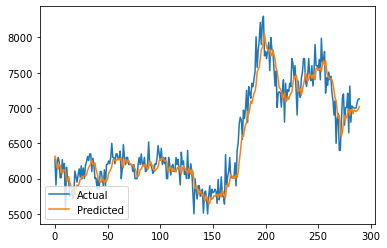

In [17]:
# create and fit the RNN network
model = Sequential()
model.add(SimpleRNN(64, activation='relu'))
model.add(Dense(1))

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
#model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)


###########################
from sklearn.metrics import r2_score

import numpy as np
from sklearn import metrics
trainpred=model.predict(x_train)
testpred = model.predict(x_test)

#Rescaling train data
trainY=scaler.inverse_transform(y_train.reshape(1190,1))
print(trainY.shape)
# trainY=trainY.transpose()

trainPredict=scaler.inverse_transform(trainpred)
print(trainPredict.shape)

#Train RMSE
score = np.sqrt(metrics.mean_squared_error(trainY,trainPredict))
print("Score (Train RMSE): {}".format(score))

#Train MAPE
def mape(trainY,trainPredict): 
    trainY, trainPredict = np.array(trainY), np.array(trainPredict)
    return np.mean(np.abs((trainY - trainPredict) / trainY)) * 100

score1=mape(trainY,trainPredict)
print("Score (Train MAPE): {}".format(score1))

#R-Squared value
r2 = r2_score(trainY, trainPredict)
print('r2 score for perfect train model is', r2)


#Rescaling test data
testY=scaler.inverse_transform(y_test.reshape(290,1))
print(testY.shape)
# testY=testY.transpose()

testPredict=scaler.inverse_transform(testpred)
print(testPredict.shape)

#Test RMSE
score = np.sqrt(metrics.mean_squared_error(testY,testPredict))
print("Score (Test RMSE): {}".format(score))

#Test MAPE
def mape(testY,testPredict): 
    testY, testPredict = np.array(testY), np.array(testPredict)
    return np.mean(np.abs((testY - testPredict) / testY)) * 100

score1=mape(testY, testPredict)
print("Score (Test MAPE): {}".format(score1))

# #R-Squared value
# r2 = r2_score(testY, testPredict)
# print('r2 score for perfect test model is', r2)

from pandas import read_csv
from pandas import to_datetime
from matplotlib import pyplot

# plot expected vs actual
pyplot.plot(testY, label='Actual')
pyplot.plot(testPredict, label='Predicted')
pyplot.legend(loc='lower left')
pyplot.show()

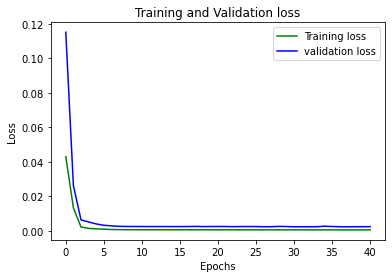

In [18]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = range(1,163)
plt.plot(loss_train, 'g', label='Training loss') #epochs
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# import pandas as pd

# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\rnn_train.csv",trainPredict)
# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\rnn_test.csv",testPredict)

# LSTM

Epoch 1/300
30/30 [==============================] - 1s 14ms/step - loss: 0.0681 - val_loss: 0.2511
Epoch 2/300
30/30 [==============================] - 0s 8ms/step - loss: 0.0515 - val_loss: 0.1977
Epoch 3/300
30/30 [==============================] - 0s 8ms/step - loss: 0.0347 - val_loss: 0.1341
Epoch 4/300
30/30 [==============================] - 0s 9ms/step - loss: 0.0173 - val_loss: 0.0633
Epoch 5/300
30/30 [==============================] - 0s 8ms/step - loss: 0.0067 - val_loss: 0.0228
Epoch 6/300
30/30 [==============================] - 0s 9ms/step - loss: 0.0048 - val_loss: 0.0184
Epoch 7/300
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - val_loss: 0.0136
Epoch 8/300
30/30 [==============================] - 0s 9ms/step - loss: 0.0030 - val_loss: 0.0088
Epoch 9/300
30/30 [==============================] - 0s 9ms/step - loss: 0.0022 - val_loss: 0.0059
Epoch 10/300
30/30 [==============================] - 0s 9ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 11

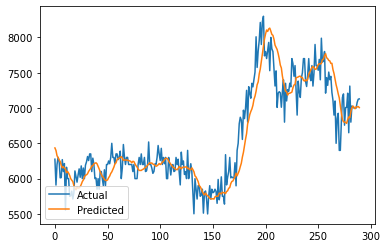

In [19]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(128, activation='relu'))
model.add(Dense(1))

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
#model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

###########################
from sklearn.metrics import r2_score
import numpy as np
from sklearn import metrics
trainpred=model.predict(x_train)
testpred = model.predict(x_test)

#Rescaling train data
trainY=scaler.inverse_transform(y_train.reshape(1190,1))
print(trainY.shape)
# trainY=trainY.transpose()

trainPredict=scaler.inverse_transform(trainpred)
print(trainPredict.shape)

#Train RMSE
score = np.sqrt(metrics.mean_squared_error(trainY,trainPredict))
print("Score (Train RMSE): {}".format(score))

#Train MAPE
def mape(trainY,trainPredict): 
    trainY, trainPredict = np.array(trainY), np.array(trainPredict)
    return np.mean(np.abs((trainY - trainPredict) / trainY)) * 100

score1=mape(trainY,trainPredict)
print("Score (Train MAPE): {}".format(score1))

#R-Squared value
r2 = r2_score(trainY, trainPredict)
print('r2 score for perfect train model is', r2)


#Rescaling test data
testY=scaler.inverse_transform(y_test.reshape(290,1))
print(testY.shape)
# testY=testY.transpose()

testPredict=scaler.inverse_transform(testpred)
print(testPredict.shape)

#Test RMSE
score = np.sqrt(metrics.mean_squared_error(testY,testPredict))
print("Score (Test RMSE): {}".format(score))

#Test MAPE
def mape(testY,testPredict): 
    testY, testPredict = np.array(testY), np.array(testPredict)
    return np.mean(np.abs((testY - testPredict) / testY)) * 100

score1=mape(testY, testPredict)
print("Score (Test MAPE): {}".format(score1))

#R-Squared value
r2 = r2_score(testY, testPredict)
print('r2 score for perfect test model is', r2)

from pandas import read_csv
from pandas import to_datetime
from matplotlib import pyplot

# plot expected vs actual
pyplot.plot(testY, label='Actual')
pyplot.plot(testPredict, label='Predicted')
pyplot.legend(loc='lower left')
pyplot.show()

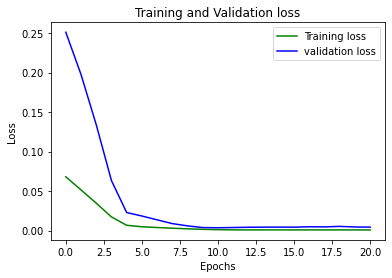

In [20]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = range(1,163)
plt.plot(loss_train, 'g', label='Training loss') #epochs
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
# import pandas as pd

# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\lstm_train.csv",trainPredict)
# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\lstm_test.csv",testPredict)

# GRU

Epoch 1/300
60/60 [==============================] - 1s 8ms/step - loss: 0.0393 - val_loss: 0.1269
Epoch 2/300
60/60 [==============================] - 0s 5ms/step - loss: 0.0157 - val_loss: 0.0594
Epoch 3/300
60/60 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.0283
Epoch 4/300
60/60 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0199
Epoch 5/300
60/60 [==============================] - 0s 5ms/step - loss: 0.0035 - val_loss: 0.0174
Epoch 6/300
60/60 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0140
Epoch 7/300
60/60 [==============================] - 0s 7ms/step - loss: 0.0026 - val_loss: 0.0114
Epoch 8/300
60/60 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0086
Epoch 9/300
60/60 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0059
Epoch 10/300
60/60 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0046
Epoch 11/

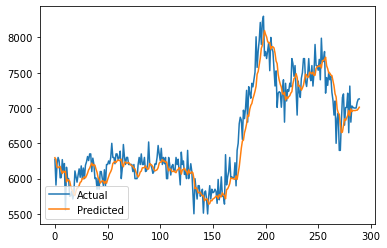

In [21]:
# create and fit the GRU network
model = Sequential()
model.add(GRU(64, activation='relu'))
model.add(Dense(1))

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
#model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)


###########################
from sklearn.metrics import r2_score
import numpy as np
from sklearn import metrics
trainpred=model.predict(x_train)
testpred = model.predict(x_test)

#Rescaling train data
trainY=scaler.inverse_transform(y_train.reshape(1190,1))
print(trainY.shape)
# trainY=trainY.transpose()

trainPredict=scaler.inverse_transform(trainpred)
print(trainPredict.shape)

#Train RMSE
score = np.sqrt(metrics.mean_squared_error(trainY,trainPredict))
print("Score (Train RMSE): {}".format(score))

#Train MAPE
def mape(trainY,trainPredict): 
    trainY, trainPredict = np.array(trainY), np.array(trainPredict)
    return np.mean(np.abs((trainY - trainPredict) / trainY)) * 100

score1=mape(trainY,trainPredict)
print("Score (Train MAPE): {}".format(score1))

#R-Squared value
r2 = r2_score(trainY, trainPredict)
print('r2 score for perfect train model is', r2)


#Rescaling test data
testY=scaler.inverse_transform(y_test.reshape(290,1))
print(testY.shape)
# testY=testY.transpose()

testPredict=scaler.inverse_transform(testpred)
print(testPredict.shape)

#Test RMSE
score = np.sqrt(metrics.mean_squared_error(testY,testPredict))
print("Score (Test RMSE): {}".format(score))

#Test MAPE
def mape(testY,testPredict): 
    testY, testPredict = np.array(testY), np.array(testPredict)
    return np.mean(np.abs((testY - testPredict) / testY)) * 100

score1=mape(testY, testPredict)
print("Score (Test MAPE): {}".format(score1))

#R-Squared value
r2 = r2_score(testY, testPredict)
print('r2 score for perfect test model is', r2)

from pandas import read_csv
from pandas import to_datetime
from matplotlib import pyplot

# plot expected vs actual
pyplot.plot(testY, label='Actual')
pyplot.plot(testPredict, label='Predicted')
pyplot.legend(loc='lower left')
pyplot.show()

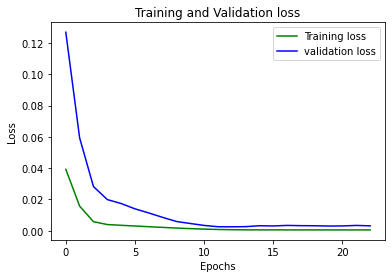

In [22]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = range(1,163)
plt.plot(loss_train, 'g', label='Training loss') #epochs
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# import pandas as pd

# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\gru_train.csv",trainPredict)
# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\gru_test.csv",testPredict)


# MLP

Epoch 1/200
60/60 [==============================] - 0s 3ms/step - loss: 0.2876 - val_loss: 1.0092
Epoch 2/200
60/60 [==============================] - 0s 1ms/step - loss: 0.1949 - val_loss: 0.6944
Epoch 3/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1166 - val_loss: 0.4276
Epoch 4/200
60/60 [==============================] - 0s 1ms/step - loss: 0.0600 - val_loss: 0.2392
Epoch 5/200
60/60 [==============================] - 0s 1ms/step - loss: 0.0280 - val_loss: 0.1343
Epoch 6/200
60/60 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0774
Epoch 7/200
60/60 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0499
Epoch 8/200
60/60 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0356
Epoch 9/200
60/60 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0283
Epoch 10/200
60/60 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0242
Epoch 11/

60/60 [==============================] - 0s 2ms/step - loss: 6.9881e-04 - val_loss: 0.0033
Epoch 82/200
60/60 [==============================] - 0s 1ms/step - loss: 6.9964e-04 - val_loss: 0.0033
Epoch 83/200
60/60 [==============================] - 0s 2ms/step - loss: 6.9328e-04 - val_loss: 0.0034
Epoch 84/200
60/60 [==============================] - 0s 2ms/step - loss: 6.9603e-04 - val_loss: 0.0033
Epoch 85/200
60/60 [==============================] - 0s 1ms/step - loss: 6.9165e-04 - val_loss: 0.0033
Epoch 86/200
60/60 [==============================] - 0s 1ms/step - loss: 6.8950e-04 - val_loss: 0.0033
Epoch 87/200
60/60 [==============================] - 0s 1ms/step - loss: 6.8566e-04 - val_loss: 0.0032
Epoch 88/200
60/60 [==============================] - 0s 1ms/step - loss: 6.8444e-04 - val_loss: 0.0032
Epoch 89/200
60/60 [==============================] - 0s 2ms/step - loss: 6.8443e-04 - val_loss: 0.0033
Epoch 90/200
60/60 [==============================] - 0s 1ms/step - loss: 6.8

60/60 [==============================] - 0s 2ms/step - loss: 5.4311e-04 - val_loss: 0.0026
Epoch 160/200
60/60 [==============================] - 0s 1ms/step - loss: 5.4112e-04 - val_loss: 0.0027
Epoch 161/200
60/60 [==============================] - 0s 1ms/step - loss: 5.4634e-04 - val_loss: 0.0026
Epoch 162/200
60/60 [==============================] - 0s 1ms/step - loss: 5.3393e-04 - val_loss: 0.0027
Epoch 163/200
60/60 [==============================] - 0s 1ms/step - loss: 5.3799e-04 - val_loss: 0.0026
Epoch 164/200
60/60 [==============================] - 0s 1ms/step - loss: 5.3298e-04 - val_loss: 0.0026
Epoch 165/200
60/60 [==============================] - 0s 2ms/step - loss: 5.3585e-04 - val_loss: 0.0026
Epoch 166/200
60/60 [==============================] - 0s 2ms/step - loss: 5.4031e-04 - val_loss: 0.0026
Epoch 167/200
60/60 [==============================] - 0s 1ms/step - loss: 5.2858e-04 - val_loss: 0.0026
Epoch 168/200
60/60 [==============================] - 0s 1ms/step - 

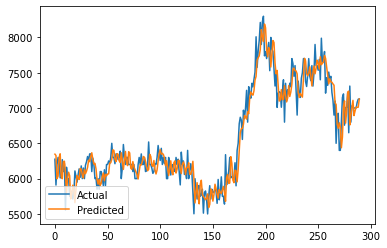

In [25]:
# create and fit the MLP network
n_steps=10
model = Sequential()
model.add(Dense(25, activation='relu', input_dim=n_steps))
model.add(Dense(1))

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
#model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=16,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)


###########################
from sklearn.metrics import r2_score
import numpy as np
from sklearn import metrics
trainpred=model.predict(x_train)
testpred = model.predict(x_test)

#Rescaling train data
trainY=scaler.inverse_transform(y_train.reshape(1190,1))
print(trainY.shape)
# trainY=trainY.transpose()

trainPredict=scaler.inverse_transform(trainpred)
print(trainPredict.shape)

#Train RMSE
score = np.sqrt(metrics.mean_squared_error(trainY,trainPredict))
print("Score (Train RMSE): {}".format(score))

#Train MAPE
def mape(trainY,trainPredict): 
    trainY, trainPredict = np.array(trainY), np.array(trainPredict)
    return np.mean(np.abs((trainY - trainPredict) / trainY)) * 100

score1=mape(trainY,trainPredict)
print("Score (Train MAPE): {}".format(score1))

#R-Squared value
r2 = r2_score(trainY, trainPredict)
print('r2 score for perfect train model is', r2)


#Rescaling test data
testY=scaler.inverse_transform(y_test.reshape(290,1))
print(testY.shape)
# testY=testY.transpose()

testPredict=scaler.inverse_transform(testpred)
print(testPredict.shape)

#Test RMSE
score = np.sqrt(metrics.mean_squared_error(testY,testPredict))
print("Score (Test RMSE): {}".format(score))

#Test MAPE
def mape(testY,testPredict): 
    testY, testPredict = np.array(testY), np.array(testPredict)
    return np.mean(np.abs((testY - testPredict) / testY)) * 100

score1=mape(testY, testPredict)
print("Score (Test MAPE): {}".format(score1))

#R-Squared value
r2 = r2_score(testY, testPredict)
print('r2 score for perfect test model is', r2)

from pandas import read_csv
from pandas import to_datetime
from matplotlib import pyplot

# plot expected vs actual
pyplot.plot(testY, label='Actual')
pyplot.plot(testPredict, label='Predicted')
pyplot.legend(loc='lower left')
pyplot.show()

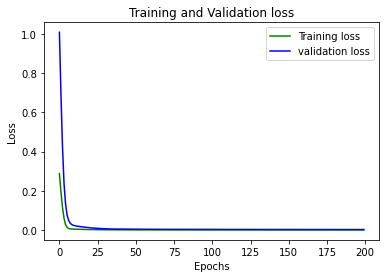

In [26]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = range(1,163)
plt.plot(loss_train, 'g', label='Training loss') #epochs
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
# import pandas as pd

# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\mlp_train.csv",trainPredict)
# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\mlp_test.csv",testPredict)


# CNN

Epoch 1/200
197/197 [==============================] - 1s 3ms/step - loss: 0.0057 - val_loss: 0.0017
Epoch 2/200
197/197 [==============================] - 0s 2ms/step - loss: 2.7394e-04 - val_loss: 0.0011
Epoch 3/200
197/197 [==============================] - 0s 2ms/step - loss: 2.5631e-04 - val_loss: 9.8672e-04
Epoch 4/200
197/197 [==============================] - 0s 2ms/step - loss: 2.4054e-04 - val_loss: 8.8749e-04
Epoch 5/200
197/197 [==============================] - 0s 2ms/step - loss: 2.2278e-04 - val_loss: 9.3295e-04
Epoch 6/200
197/197 [==============================] - 0s 2ms/step - loss: 2.1094e-04 - val_loss: 8.0676e-04
Epoch 7/200
197/197 [==============================] - 0s 2ms/step - loss: 2.0000e-04 - val_loss: 7.6777e-04
Epoch 8/200
197/197 [==============================] - 0s 2ms/step - loss: 1.9144e-04 - val_loss: 7.2041e-04
Epoch 9/200
197/197 [==============================] - 0s 2ms/step - loss: 1.8025e-04 - val_loss: 7.1144e-04
Epoch 10/200
197/197 [=========

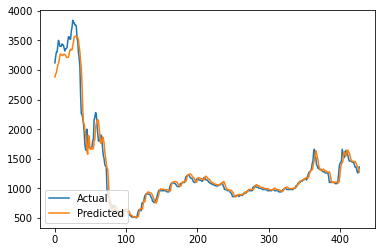

In [28]:
# create and fit the CNN network
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

n_steps=10
n_features=1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
#model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=16,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)


###########################
from sklearn.metrics import r2_score
import numpy as np
from sklearn import metrics
trainpred=model.predict(x_train)
testpred = model.predict(x_test)

#Rescaling train data
trainY=scaler.inverse_transform(y_train.reshape(3935,1))
print(trainY.shape)
# trainY=trainY.transpose()

trainPredict=scaler.inverse_transform(trainpred)
print(trainPredict.shape)

#Train RMSE
score = np.sqrt(metrics.mean_squared_error(trainY,trainPredict))
print("Score (Train RMSE): {}".format(score))

#Train MAPE
def mape(trainY,trainPredict): 
    trainY, trainPredict = np.array(trainY), np.array(trainPredict)
    return np.mean(np.abs((trainY - trainPredict) / trainY)) * 100

score1=mape(trainY,trainPredict)
print("Score (Train MAPE): {}".format(score1))

#R-Squared value
r2 = r2_score(trainY, trainPredict)
print('r2 score for perfect train model is', r2)


#Rescaling test data
testY=scaler.inverse_transform(y_test.reshape(428,1))
print(testY.shape)
# testY=testY.transpose()

testPredict=scaler.inverse_transform(testpred)
print(testPredict.shape)

#Test RMSE
score = np.sqrt(metrics.mean_squared_error(testY,testPredict))
print("Score (Test RMSE): {}".format(score))

#Test MAPE
def mape(testY,testPredict): 
    testY, testPredict = np.array(testY), np.array(testPredict)
    return np.mean(np.abs((testY - testPredict) / testY)) * 100

score1=mape(testY, testPredict)
print("Score (Test MAPE): {}".format(score1))

#R-Squared value
r2 = r2_score(testY, testPredict)
print('r2 score for perfect test model is', r2)

from pandas import read_csv
from pandas import to_datetime
from matplotlib import pyplot

# plot expected vs actual
pyplot.plot(testY, label='Actual')
pyplot.plot(testPredict, label='Predicted')
pyplot.legend(loc='lower left')
pyplot.show()

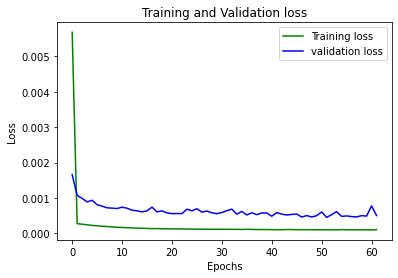

In [29]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = range(1,163)
plt.plot(loss_train, 'g', label='Training loss') #epochs
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# import pandas as pd

# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\cnn_train.csv",trainPredict)
# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\cnn_test.csv",testPredict)


# Bi-LSTM

Epoch 1/300
99/99 [==============================] - 5s 12ms/step - loss: 0.0305 - val_loss: 0.0624
Epoch 2/300
99/99 [==============================] - 1s 7ms/step - loss: 0.0076 - val_loss: 0.0139
Epoch 3/300
99/99 [==============================] - 1s 7ms/step - loss: 7.9478e-04 - val_loss: 0.0030
Epoch 4/300
99/99 [==============================] - 1s 6ms/step - loss: 2.5493e-04 - val_loss: 0.0020
Epoch 5/300
99/99 [==============================] - 1s 6ms/step - loss: 2.3420e-04 - val_loss: 0.0016
Epoch 6/300
99/99 [==============================] - 1s 6ms/step - loss: 2.2944e-04 - val_loss: 0.0015
Epoch 7/300
99/99 [==============================] - 1s 6ms/step - loss: 2.2535e-04 - val_loss: 0.0014
Epoch 8/300
99/99 [==============================] - 1s 6ms/step - loss: 2.2226e-04 - val_loss: 0.0013
Epoch 9/300
99/99 [==============================] - 1s 6ms/step - loss: 2.1559e-04 - val_loss: 0.0012
Epoch 10/300
99/99 [==============================] - 1s 6ms/step - loss: 2.1179

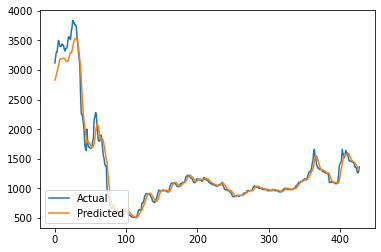

In [31]:
# create and fit the LSTM network
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu')))
model.add(Dense(1))

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
#model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

###########################
from sklearn.metrics import r2_score
import numpy as np
from sklearn import metrics
trainpred=model.predict(x_train)
testpred = model.predict(x_test)

#Rescaling train data
trainY=scaler.inverse_transform(y_train.reshape(3935,1))
print(trainY.shape)
# trainY=trainY.transpose()

trainPredict=scaler.inverse_transform(trainpred)
print(trainPredict.shape)

#Train RMSE
score = np.sqrt(metrics.mean_squared_error(trainY,trainPredict))
print("Score (Train RMSE): {}".format(score))

#Train MAPE
def mape(trainY,trainPredict): 
    trainY, trainPredict = np.array(trainY), np.array(trainPredict)
    return np.mean(np.abs((trainY - trainPredict) / trainY)) * 100

score1=mape(trainY,trainPredict)
print("Score (Train MAPE): {}".format(score1))

#R-Squared value
r2 = r2_score(trainY, trainPredict)
print('r2 score for perfect train model is', r2)


#Rescaling test data
testY=scaler.inverse_transform(y_test.reshape(428,1))
print(testY.shape)
# testY=testY.transpose()

testPredict=scaler.inverse_transform(testpred)
print(testPredict.shape)

#Test RMSE
score = np.sqrt(metrics.mean_squared_error(testY,testPredict))
print("Score (Test RMSE): {}".format(score))

#Test MAPE
def mape(testY,testPredict): 
    testY, testPredict = np.array(testY), np.array(testPredict)
    return np.mean(np.abs((testY - testPredict) / testY)) * 100

score1=mape(testY, testPredict)
print("Score (Test MAPE): {}".format(score1))

#R-Squared value
r2 = r2_score(testY, testPredict)
print('r2 score for perfect test model is', r2)

from pandas import read_csv
from pandas import to_datetime
from matplotlib import pyplot

# plot expected vs actual
pyplot.plot(testY, label='Actual')
pyplot.plot(testPredict, label='Predicted')
pyplot.legend(loc='lower left')
pyplot.show()

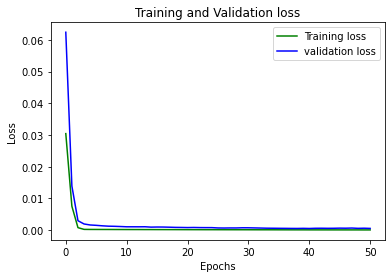

In [32]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = range(1,163)
plt.plot(loss_train, 'g', label='Training loss') #epochs
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
# import pandas as pd

# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\Bi-lstm_train.csv",trainPredict)
# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\Bi-lstm_test.csv",testPredict)


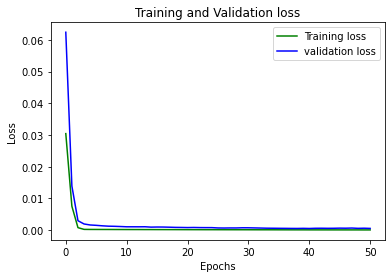

In [34]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = range(1,163)
plt.plot(loss_train, 'g', label='Training loss') #epochs
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
# import pandas as pd

# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\stack-lstm_train.csv",trainPredict)
# np.savetxt("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\stack-lstm_test.csv",testPredict)


In [36]:
# def mape(trainY,trainPredict): 
#     trainY, trainPredict = np.array(trainY), np.array(trainPredict)
#     return np.mean(np.abs((trainY - trainPredict) / trainY)) * 100

# score1=mape(trainY,trainPredict)
# print("Score (Train MAPE): {}".format(score1))

# def mape(testY,testPredict): 
#     testY, testPredict = np.array(testY), np.array(testPredict)
#     return np.mean(np.abs((testY - testPredict) / testY)) * 100

# score1=mape(testY, testPredict)
# print("Score (Test MAPE): {}".format(score1))


In [37]:
# from sklearn.metrics import r2_score

# r2 = r2_score(trainY, trainPredict)
# print('r2 score for perfect train model is', r2)

# r2 = r2_score(testY, testPredict)
# print('r2 score for perfect test model is', r2)

In [38]:
# Diebold-Mariano test (DM test) to check the significant performance of models over each other
from dieboldmariano import dm_test

data = pd.read_csv("C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\DM_test.csv")

print(dm_test(data['Actual'],data['Transformer'],data['RNN'], one_sided=True))
print(dm_test(data['Actual'],data['Transformer'],data['LSTM'], one_sided=True))
print(dm_test(data['Actual'],data['Transformer'],data['GRU'], one_sided=True))

print(dm_test(data['Actual'],data['RNN'],data['LSTM'], one_sided=True))
print(dm_test(data['Actual'],data['RNN'],data['GRU'], one_sided=True))

print(dm_test(data['Actual'],data['LSTM'],data['GRU'], one_sided=True))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\haris\\OneDrive\\Desktop\\Seminar_Transformers\\DM_test.csv'